In this activity, we're going to focus our attention in how it change a linear model based on the data splitting.

# Linear regression


In [1]:
#libraries
import matplotlib.pyplot as plt # import matplotlib to plot the data
from matplotlib.collections import LineCollection # import LineCollection to plot the data as a line
%matplotlib inline # show plots inline
import seaborn as sns # import seaborn to plot the data
import pandas as pd # dataframe manipulation
import numpy as np # array manipulation
from ipywidgets import interactive # import interactive widgets to interact with the data
import ipywidgets as widgets # import widgets to interact with the data

## Loading data

Let's work with a new toy dataset. 




In [2]:
data = pd.read_csv("data/insurance.csv") # read the data in the csv file
data.head() # show the first 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In this case, we will try to predict the column `charges` based on the other columns

# Data exploration

Let's do some basic exploration

In [3]:
data.info() # show the data information (number of rows, columns, data types, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


As expected, three columns of the dataset are categorical:

* sex
* smoker
* region

Even more, all of them are nominal categorical, ie: there is no intrinsic order in their values.


In [4]:
data.isna().sum() # show the number of missing values in each column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.describe() # show the mean, standard deviation, min, max, etc. of each column

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data['sex'].value_counts() # Return a Series containing counts of unique values. (descending order so that the first element is the most frequently-occurring)

male      676
female    662
Name: sex, dtype: int64

In [7]:
data['smoker'].value_counts() # Return a Series containing counts of unique values. (descending order so that the first element is the most frequently-occurring)

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
data['region'].value_counts() # Return a Series containing counts of unique values. (descending order so that the first element is the most frequently-occurring)

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

### Sex

First, in order to be safe let's check the possible values.

In [9]:
data['sex'].unique() # Return unique values of Series object.(order of appearance)

array(['female', 'male'], dtype=object)

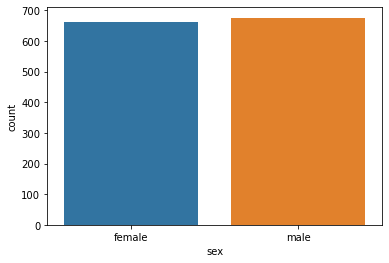

In [10]:
sns.countplot(data=data, x = 'sex'); # Show the counts of observations in each categorical bin using bars.(Dataset for plotting, x-axis variable) 

Good, we have almost the same value of customers of gender.

Let's assume that those gender are the only possible values. If that's not the case, we can include another label for those non covered genders. However be aware that the model will not be able to make predictions for those genders are they are not in the dataset.

**Remember that linear models can't handle labels, they need numbers**. Therefore we need to convert those labels to numbers. The actual values doesn't matter here because there is no order. However, linear models give more weight to higher values. Therefore we need to convert those labels to boolean data.

In [11]:
data['sex'] = data['sex'].replace({'male': 1, 'female': 0}) # replace male for 1 amd female for 0 to convert these labels into boolean data
data.head() # show the first 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


### Smoker

Now it's time to inspect the variable `smoker`

In [12]:
data['smoker'].unique() # Return unique values of Series object.(order of appearance)

array(['yes', 'no'], dtype=object)

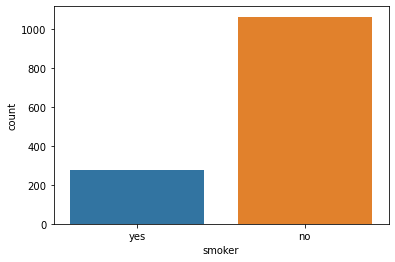

In [13]:
sns.countplot(data=data, x = 'smoker'); # Show the counts of observations in each categorical bin using bars.(Dataset for plotting, x-axis variable) 

This is a very bad thing. The dataset doesn't contain the roughly the same amount of non-smokers than smokers. Why this is a problem? Becasue the model will have more examples of non-smokers than smokers, and therefore it will be better in predicting `non-smokers`.
Therefore we can expect the model to make more mistakes for `smoker` customers. 

This problem is called `class imbalance` and there are several techniques available to tackle this problem that will be covered later in the course.

For now, let's ignore this problem and convert those values to numbers.

In [14]:
data['smoker'] = data['smoker'].replace({'yes':1, 'no': 0})  # replace yes for 1 amd no for 0 to convert these labels into boolean data
data.head() # show the first 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### Region

Again let's start with some basic exploration.

In [15]:
data['region'].unique() # Return unique values of Series object.(order of appearance)

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

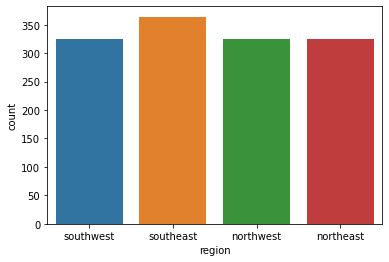

In [16]:
sns.countplot(data=data, x = 'region'); # Show the counts of observations in each categorical bin using bars.(Dataset for plotting, x-axis variable) 

Here we don't have the same problem as we have for variable `smoker` as we have roghly the same amount of customers in every region.

In clear contrast with variables `sex` and `somker`, the possible values for this variable is bigger than two. Therefore, we can't simply use two values. The solution to this is to create one additional column for each possible value of this variable. Then the values in the column will be either 0 or 1. 

In [17]:
pd.get_dummies(data['region']) # convert categorical data into dummy variables (one hot encoding)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


However, we can't use the data like this because any column can be predicted based on the others. To understand this, consider one customer from one given region. For this customer, if you know the values of the other region columns, automatically you know what is the value for the given region. This phenomenom is called `dummy trap`. Therefore, we need to drop one `region` column ( no matter which ). We can do this using a keyword from `get_dummies()`

In [18]:
dum = pd.get_dummies(data['region'], drop_first=True) # convert categorical data into dummy variables (one hot encoding) and drop the first column
dum.head() # show the first 5 rows of the data

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0


In this case, pandas dropped the column `northeast`.

Now we can drop column `region` from the original dataframe and add the dummified dataframe.

In [19]:
data = data.drop(columns=['region']) # drop the original categorical data
data = pd.concat([data,dum], axis = 1) # concatenate the new dummy variables to the original data
data.head() # show the first 5 rows of the data

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


Finally let's reorder the columns

In [20]:
list(data.columns) # show the column names of the data in a list

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'charges',
 'northwest',
 'southeast',
 'southwest']

In [21]:
new_order = ['age', # create a new list with the column names in the desired order
 'sex',
 'bmi',
 'children',
 'smoker',
 'northwest',
 'southeast',
 'southwest',
 'charges']

data = data[new_order] # reorder the columns as the desired oorder
data.head() # show the first 5 rows of the data

,age,sex,bmi,children,smoker,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,1,16884.92400
1,18,1,33.770,1,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,1,0,4449.46200
3,33,1,22.705,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,1,0,0,3866.85520


# Visualizing data

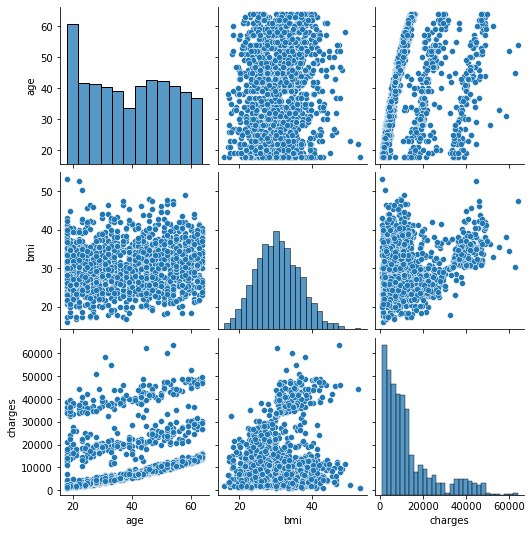

In [22]:
sns.pairplot(data[['age','bmi','charges']]); # plot the data in a scatter plot matrix with the age, bmi, and charges columns

As you can see, the variable `children` was not included in the previous plot. There reason is because `children` is an **ordinal categorical feature**. You can't have 1.5 sons and two is more than one. 

On the other hand, we can clearly see that the distribution of the three included variables are totally different.

The varaible `age` has roughly a **uniform** distribution ( all the possible values are mostly equally likely ), while `bmi` resembles a **normal distribution**. Finally variable `charges` show a highly right skewed distribution which resembles an **exponential decay**. 

# Summarizing the transformations

It's important to gather all the transformations into a single function which can be used later to prepare a dataset.

In [23]:
def preprocess(df): 
    '''
    Function to take a dataset and return a cleaned dataset.
    Input: Pandas dataframe
    Output: Cleaned Pandas dataframe
    '''

    df2 = df.copy() # create a copy of the dataframe

    df2['sex'] = df2['sex'].replace({'male': 1, 'female': 0}) # replace male for 1 amd female for 0 to convert these labels into boolean data
    df2['smoker'] = df2['smoker'].replace({'yes':1, 'no': 0}) # replace yes for 1 amd no for 0 to convert these labels into boolean data

    df2['northwest'] = 0 # create a new column with all values set to 0
    df2['southeast'] = 0 # create a new column with all values set to 0
    df2['southwest'] = 0 # create a new column with all values set to 0 

    for index, value in enumerate(df2['region']): # for each value in the region column of the dataframe 
        if ( value == 'northwest'): # if the value is equal to 'northwest'
            df2['northwest'][index] = 1 # set the value of the new column to 1
        elif ( value == 'southeast' ): # if the value is equal to 'southeast'
            df2['southeast'][index] = 1 # set the value of the new column to 1
        elif ( value == 'southwest' ): # if the value is equal to 'southwest'
            df2['southwest'][index] = 1 # set the value of the new column to 1
        else: # if the value is not equal to 'northwest', 'southeast', or 'southwest'
            continue # do nothing

    df2 = df2.drop(columns = ['region']) # drop the original categorical data column

    new_order = ['age', # create a new list with the column names in the desired order
        'sex',
        'bmi',
        'children',
        'smoker',
        'northwest',
        'southeast',
        'southwest',
        'charges']

    df2 = df2[new_order] # reorder the columns as the desired oorder
    
    return df2 # return the cleaned dataframe

Let's double check if our function works properly

In [24]:
data2 = pd.read_csv("data/insurance.csv") # read the data in the csv file
data2.head() # show the first 5 rows of the data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
preprocess(data2) # call the preprocess function on the dataframe to clean it

<ipython-input-23-0704aabcb81a>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['southwest'][index] = 1
<ipython-input-23-0704aabcb81a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['southeast'][index] = 1
<ipython-input-23-0704aabcb81a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['northwest'][index] = 1


,age,sex,bmi,children,smoker,northwest,southeast,southwest,charges
0,19,0,27.900,0,1,0,0,1,16884.92400
1,18,1,33.770,1,0,0,1,0,1725.55230
2,28,1,33.000,3,0,0,1,0,4449.46200
3,33,1,22.705,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0,10600.54830
1334,18,0,31.920,0,0,0,0,0,2205.98080
1335,18,0,36.850,0,0,0,1,0,1629.83350
1336,21,0,25.800,0,0,0,0,1,2007.94500


# Data splitting

Now let's divide the dataframe into independent features and dependent features before doing any transformation.

In [26]:
X = data.drop(columns=['charges']) # create a new dataframe with all the columns except the charges column and assign it to X
y = data['charges'] # create series with the charges column and assign it to y

To divide the dataset into `train` and `test` sets we can make use of [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html?highlight=train_test_split#sklearn.model_selection.train_test_split) funtion of sklearn.

In [27]:
from sklearn.model_selection import train_test_split # import train_test_split to split the data into training and testing sets

In [28]:
# Fix "random_state" value ( the actual value doesn't matter )as otherwise you will get a different split every time you run the code.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 24) # Changed the value

# Using the scalers/transformers

Now it's time to transform the columns. In this case we're going to use the `PowerTransformer()` as usually gives the best possible results.

We will handle separatelly the columns on `X` and `y`

In [29]:
from sklearn.preprocessing import PowerTransformer # import PowerTransformer to transform the data to logarithmic scale

We create an `object` for the scaler and we fit it with the **train** set. 

In [30]:
p_scaler = PowerTransformer() # create a PowerTransformer object to transform the data to logarithmic scale and assign it to p_scaler
p_scaler.fit(X_train) # fit the PowerTransformer object to the training data and assign the result to p_scaler

PowerTransformer()

Let's save our transformer

In [31]:
import pickle  # import pickle to save the PowerTransformer object

def save_scaler(amount, filename = "scaler.pkl"):  # create a function to save the PowerTransformer object
    with open(filename, "wb") as f: # open the file in binary mode and assign it to f
        pickle.dump(amount, f) # save the PowerTransformer object to the file in binary mode

In [ ]:
save_scaler(p_scaler, filename = "p_scaler2.pkl") # call the save_scaler function to save the PowerTransformer object

Now it's time to transform our data with the transformer.

In [32]:
X_train_scaled = p_scaler.transform(X_train) # transform the training data to logarithmic scale and assign it to X_train_scaled
X_test_scaled  = p_scaler.transform(X_test) # transform the testing data to logarithmic scale and assign it to X_test_scaled

X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns ) # convert the transformed training data to a dataframe and assign it to X_train_scaled
X_test_scaled  = pd.DataFrame(X_test_scaled, columns = X_test.columns ) # convert the transformed testing data to a dataframe and assign it to X_test_scaled

display(X_train_scaled.head()) # show the first 5 rows of the transformed training data
display(X_test_scaled.head()) # show the first 5 rows of the transformed testing data

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,-1.106461,0.966377,-0.281688,-1.086656,1.962076,-0.570771,-0.611923,-0.569125
1,0.359448,-1.034793,0.361749,0.273575,-0.509664,-0.570771,1.634193,-0.569125
2,0.224785,0.966377,-0.025696,-1.086656,1.962076,-0.570771,-0.611923,1.757082
3,-0.945169,-1.034793,0.660242,0.936876,-0.509664,-0.570771,-0.611923,1.757082
4,1.610054,0.966377,-0.795510,0.936876,-0.509664,-0.570771,-0.611923,1.757082


,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,-0.121664,-1.034793,1.305374,-1.086656,1.962076,-0.570771,1.634193,-0.569125
1,1.004362,-1.034793,0.416914,-1.086656,-0.509664,-0.570771,-0.611923,-0.569125
2,-0.945169,0.966377,2.468423,0.273575,-0.509664,-0.570771,1.634193,-0.569125
3,0.751666,0.966377,0.660242,0.936876,1.962076,-0.570771,-0.611923,1.757082
4,0.426008,-1.034793,0.833117,-1.086656,-0.509664,-0.570771,-0.611923,1.757082


# Dependent feature

For the dependent feature, as it shows a distribution which seems to follow an exponential decay distribution, we can simply use the logarithm.

You may wonder why we didn't include the dependent feature in the scaler for `X` to do all in once. The answer is because in a real scenario, your model will not get `y` values! If you fir your scaler to scale the `X` and the `y` together, when you submit new data to the scaler without `y`it will complain because it will not find the `y`.

In [33]:
y_train_scaled = np.log(y_train) # transform the training data to logarithmic scale and assign it to y_train_scaled
y_train_df = pd.DataFrame({'y_train': y_train.values, 'y_train_scaled': y_train_scaled.values}) # convert the transformed training data to a dataframe and assign it to y_train_df
y_train_df # show the transformed training data

,y_train,y_train_scaled
0,35147.52848,10.467310
1,7633.72060,8.940331
2,22144.03200,10.005323
3,3987.92600,8.291027
4,14988.43200,9.615034
...,...,...
931,5138.25670,8.544469
932,13981.85035,9.545515
933,2137.65360,7.667464
934,2117.33885,7.657915


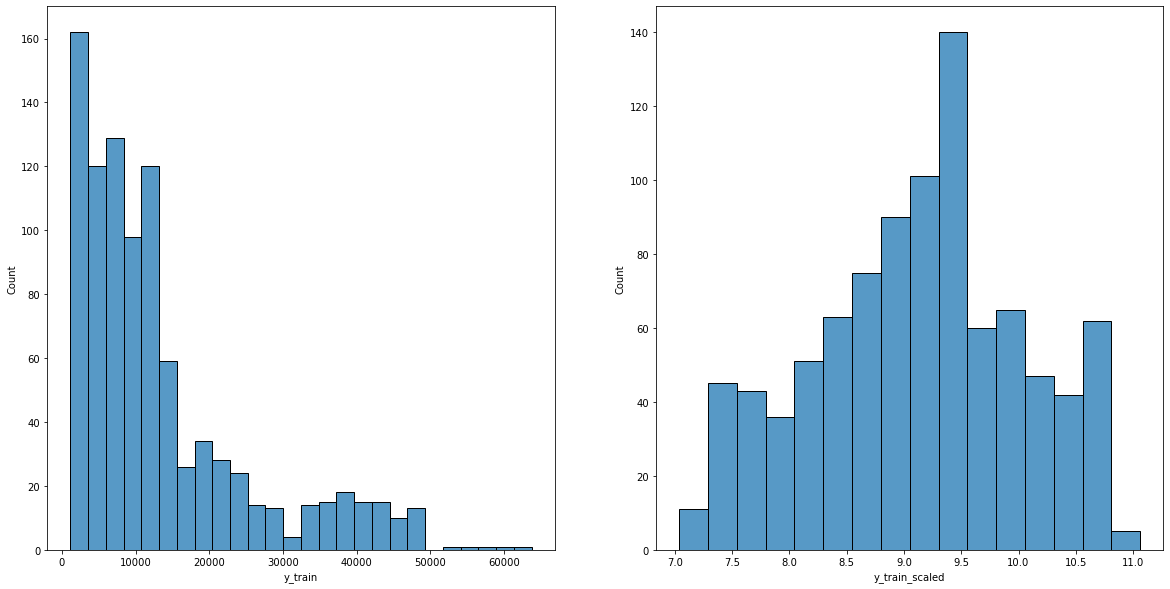

In [34]:
fig, ax = plt.subplots(nrows =1, ncols = 2, figsize = (20,10)) # create a figure and axes with 1 row and 2 columns with the size of 20 by 10
sns.histplot(data=y_train_df,x ="y_train", ax = ax[0]); # plot the histogram of the training data and assign it to ax[0]
sns.histplot(data=y_train_df,x ="y_train_scaled", ax = ax[1]); # plot the histogram of the transformed training data and assign it to ax[1]

# Training the multiple regression model

Finally, we are ready to train the multiple regression model. In contrast with the previous case, now we will have more than one independent feature. Therefore, we are going to train a model like this:

$$\hat{y_{i}}=\hat{\beta_{0}}+\sum_{col}\hat{\beta_{i}}x^{col}$$

where $\hat{\beta_{0}}$ is called the *intercept*, and the beta's have a caret over them because they will depended on the training set. Remember that the observations in the training set were selected at random. Therefore, each random selection produces a different training set and then the optimal parameter for training set will different.

In order to train a multiple linear model, we can use again sklearn.

In [35]:
from sklearn.linear_model import LinearRegression # import LinearRegression to create a linear regression model

As usual, first we nedd to create and linear model `object`.

In [36]:
lm = LinearRegression() # create a LinearRegression object and assign it to lm

Now we train our model using only the **scaled** data from the **train set**. Pay attention to the dependent feature. Here we are training the model to predict the `y_train_scaled`. Therefore, our model will predict **scaled data**. In order to recover the correct predictions, we will have to compute the exponential of the predicted values. This can be done with `np.exp()`.

In [37]:
lm.fit(X_train_scaled,y_train_scaled) # fit the LinearRegression object to the training data and assign the result to lm with the transformed training data and the transformed training labels

LinearRegression()

Finally we save our model for later. We can use a function for this in a similar way as we did for saving our scaler

In [38]:
def save_model(model, filename = "lm.pkl"): # create a function to save the LinearRegression object
    with open(filename, "wb") as f: # open the file in binary mode and assign it to f
        pickle.dump(model, f) # save the LinearRegression object to the file in binary mode

In [ ]:
save_model(lm, filename = "lm2.pkl") # call the save_model function to save the LinearRegression object

# Making predictions

Now let's see how to make predictions with our model. For this purpose, any sklearn model has the method `predict()` in which we need to provide the independent features. 

**CAVEAT!!!*** If you trained your model with scaled features, then you will need to feed the `predict()` method with scaled features.

In [39]:
y_train_pred = lm.predict(X_train_scaled) # predict the transformed training labels and assign it to y_train_pred
y_test_pred  = lm.predict(X_test_scaled) # predict the transformed testing labels and assign it to y_test_pred

However, remember that the method was trained to predict **the logarithm of the customer charges!!!** You can compare the predicted values by the model straight away. You will need first to undo the transformation. As we trained the model to predict the logarithm, we will have to take the exponential to recover the predicted values in the original units.

In [40]:
y_train_pred_real = np.exp(y_train_pred) # transform the predicted training labels back to real values and assign it to y_train_pred_real
y_test_pred_real  = np.exp(y_test_pred) # transform the predicted testing labels back to real values and assign it to y_test_pred_real
y_train_pred_real # show the predicted training labels

array([16016.20017481,  8412.74398699, 26962.87462761,  4851.35846262,
       13938.22736485, 12493.91601077,  5331.81390721,  4653.155464  ,
       12335.31191268,  4170.62971938, 13657.83022027, 10132.89625668,
        3868.60399793,  6804.97437479,  5180.414595  , 13957.69348161,
        3665.05745915,  3702.17160594, 30836.45737174,  3744.42083483,
       10759.01107575,  3413.59843847, 13984.46820556, 40386.82131602,
        5251.32235072,  5100.72978113,  8018.872747  ,  9176.87683843,
       26722.06592026,  5340.05689729, 12943.23500512,  3150.18266502,
        8277.3515073 ,  4995.2048586 ,  4894.61117323, 15990.91648806,
        6479.6564116 ,  9154.03860108,  2176.6561835 ,  4833.75870177,
        7996.99681118, 25052.219342  ,  6697.81045728,  8614.01634576,
       10497.28132104,  5426.22922455, 24935.31037112, 29875.47551353,
        6013.80523397,  9597.08815474,  6813.52427032, 12880.70071579,
       17009.29915726,  2617.15254465,  9062.25650957, 58123.72527311,
      

As you can see, `np.exp()` returns a numpy array. 

# Getting the coefficients

Now we would like to know the $\hat{\beta_{i}}$ values. We can obtain them, with.

In [41]:
lm.coef_ # show the coefficients of the linear regression model

array([ 0.49604318, -0.04100977,  0.08933999,  0.12024496,  0.61556761,
       -0.03768807, -0.06793841, -0.06979858])

Each coeficient corresponds to each independent variable. Therefore...

In [42]:
coefficients = [] # create a list to store the coefficients of the linear regression model

for index, value in enumerate(X_train.columns): # loop through the columns of the training data
    coefficients.append((np.abs(lm.coef_[index]),value)) # append the absolute value of the coefficient and the column name to the list

coefficients.sort(reverse=True) # sort the list in descending order
coefficients # show the sorted list

[(0.6155676135761138, 'smoker'),
 (0.4960431793116082, 'age'),
 (0.12024495937616046, 'children'),
 (0.08933999043186429, 'bmi'),
 (0.06979858329587459, 'southwest'),
 (0.06793841235598444, 'southeast'),
 (0.04100976803780425, 'sex'),
 (0.03768806647147566, 'northwest')]

According to the absolute value, we can clearly see that the most relevant variables to predict the customer charges are:

* smoker
* sex
* children

as they have the highest absolute values

Finally ,we can get the intercept with.

In [43]:
lm.intercept_ # show the intercept of the linear regression model

9.115071670174284

* Compare the new coefficients of the model with the old ones obtained in the code along

```
Old coeficients:
array([ 0.48616037, -0.03823913,  0.08677916,  0.10821631,  0.6305174 ,
       -0.03051781, -0.07136718, -0.05407714])

Old intercept:
9.109006822397197

New coeficients:
array([ 0.49604318, -0.04100977,  0.08933999,  0.12024496,  0.61556761,
       -0.03768807, -0.06793841, -0.06979858])

New intercept:
9.115071670174284

They have changed because the sample is different, even though the change is small.
This shows us two things:
    - the model depends on the sample!!!
    - this particular model seems to be quite robust as the coeficients doesn't change too much
    - more and more samples should be drawn to perform an statistical analysis of the estimated coeficients
```

 * Are the most important variables the same? 

 ```
 Yes
 ```

 * Are the associated coefficients the same as the obtained during the lesson?

 ```
 Of course not for **this particular case!!!**
 ```